In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import units as u
from astropy.analytic_functions import blackbody_lambda, blackbody_nu
%matplotlib inline

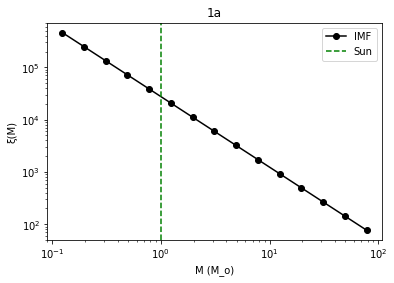

In [8]:
plt.axis()

α = 2.35
M1 = 0.1
M2 = 100
N = 1e6
ΔlogM = 0.2
ξ0 = 1.35 * N / ((M1**(-1.35))-(M2**(-1.35)))
bins = int((np.log10(M2) - np.log10(M1)) / ΔlogM)
M_bins = np.logspace(-1, 2, bins+1)
M = np.zeros(bins)
N = np.zeros(bins)
for i in range(15):
    M_min = M_bins[i]
    M_max = M_bins[i+1]
    M_bin = np.logspace(np.log10(M_min), np.log10(M_max), 100)
    N_bin = ξ0 * ((M_min**(-1.35))-(M_max**(-1.35))) / 1.35
    ξ_M = ξ0 * M_bin**(-α)
    M_tot = ξ0 * ((M_min**(-0.35))-(M_max**(-0.35))) / 0.35
    M_mean = M_tot / N_bin
    M[i] = M_mean
    N[i] = N_bin
    
    #rec = patches.Rectangle((M_min, 0.001), M_max-M_min, np.mean(ξ_M), color='b', fill=False)
    #plt.gca().add_patch(rec)
    
# Popultion of stars with M < M_o
Nsun = ξ0 * ((M1**(-1.35))-(1**(-1.35))) / 1.35
Msun = ξ0 * ((M1**(-0.35))-(1**(-0.35)))/0.35



plt.loglog(M, N, 'k-o', label='IMF')
plt.axvline(1, color='g', linestyle='--', label = 'Sun')
plt.xlabel('M (M_o)')
plt.ylabel('ξ(M)')
plt.title('1a')
plt.legend()

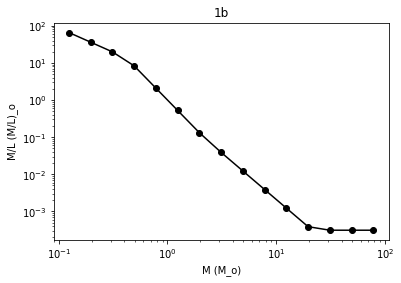

In [9]:
L = []
for m in M:
    if m < 0.43:
        L.append(0.23 * (m **2.3))
    elif 0.43 < m < 2:
        L.append(m**4)
    elif 2 < m < 20:
        L.append(1.5 * (m**3.5))
    elif m > 20:
        L.append(3200 * m)

L = np.array(L)
        
plt.loglog(M, M/L, 'k-o')
plt.xlabel('M (M_o)')
plt.ylabel('M/L (M/L)_o')
plt.title('1b')

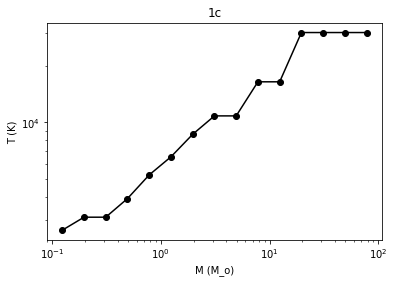

In [10]:
T_file = "TL.dat"
T_dat = Table.read(T_file, format='ascii')
T = np.zeros(len(L))

for i in range(len(L)):
    diff = L[i] - T_dat['L(L_sun)']
    ind = np.argmin(abs(diff))
    T[i]= T_dat['T(K)'][ind]
    
plt.loglog(M, T, 'ko-')
plt.xlabel('M (M_o)')
plt.ylabel('T (K)')
plt.title('1c')

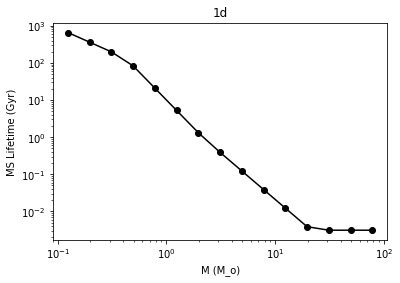

In [58]:
τ_sun = 10 #MS lifetime of the Sun in Gyrs
τ = τ_sun * M / L
plt.loglog(M, τ, 'ko-')
plt.xlabel('M (M_o)')
plt.ylabel('MS Lifetime (Gyr)')
plt.title('1d')

In [72]:
t_steps = τ[np.where((τ >=.1)&(τ<=13))]
int_specs_L = []
int_specs_f = []

for i in range(len(t_steps)): 
    spec_L = 0
    spec_f = 0
    ind = np.where(τ >= t_steps[i]) 
    for j in range(len(ind[0])):
        spec_L += specs_L[j] * N[j]
        spec_f += specs_f[j] * N[j]
    int_specs_L.append(spec_L)
    int_specs_f.append(spec_f)

array([  6.55728980e+02,   3.60349876e+02,   1.98026986e+02,
         8.30816491e+01,   2.08691667e+01,   5.24209767e+00,
         1.31675540e+00,   3.89191187e-01,   1.23073060e-01,
         3.89191187e-02,   1.23073060e-02,   3.89191187e-03,
         3.12500000e-03,   3.12500000e-03,   3.12500000e-03])

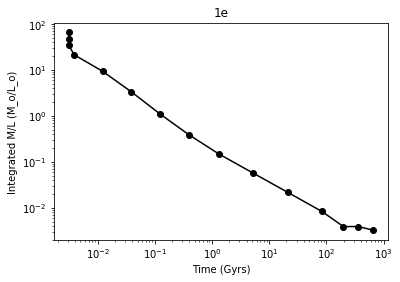

In [78]:
ML_t = np.zeros(bins)
for i in range(bins):
    ind = np.where(τ >= τ[i])
    ML_t[i] = np.sum(M[ind]*N[ind])/np.sum(L[ind]*N[ind])
    
plt.loglog(τ[::-1], ML_t, 'ko-')
plt.xlabel('Time (Gyrs)')
plt.ylabel('Integrated M/L (M_o/L_o)')
plt.title('1e')

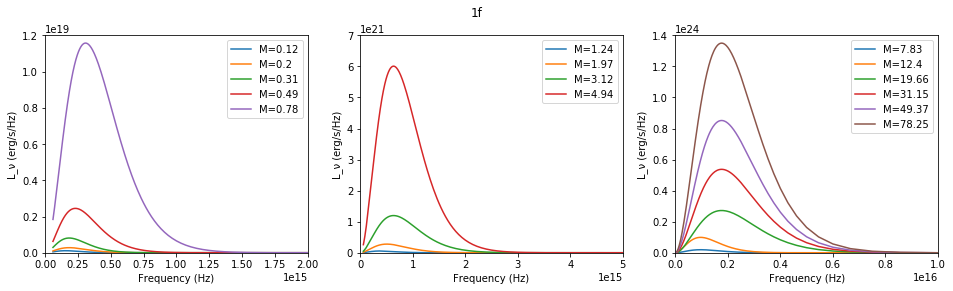

In [67]:
plt.figure(1, figsize=(16,4))

λ = np.linspace(10, 5000, 1000) * u.nm
ν = λ.to(u.Hz, equivalencies=u.spectral())
specs_L = []
specs_f = []
for i in range(bins):
    temperature = T[i] * u.K
    flux_nu = blackbody_nu(λ, temperature)
    R = 69.57e9 * np.sqrt(L[i]) * (((5780/T[i])**2)) #radius of star wrt Sun (cm)
    L_ν = flux_nu * ((4*np.pi*R)**2)
    specs_L.append(L_ν)
    specs_f.append(flux_nu)
    if i <= 4:
        plt.subplot(131)
        plt.plot(ν, L_ν, '-', label='M='+str(np.round(M[i], 2)))       
    elif i <= 8:
        plt.subplot(132)
        plt.plot(ν, L_ν, '-', label='M='+str(np.round(M[i], 2)))   
    else:
        plt.subplot(133)
        plt.plot(ν, L_ν, '-', label='M='+str(np.round(M[i], 2)))        

plt.subplot(131)       
plt.xlabel('Frequency (Hz)')
plt.ylabel('L_ν (erg/s/Hz)')
plt.legend()
plt.axis([0, 2e15, 0, 1.2e19])
plt.subplot(132)       
plt.xlabel('Frequency (Hz)')
plt.ylabel('L_ν (erg/s/Hz)')
plt.legend()
plt.axis([0, .5e16, 0, 7e21])
plt.subplot(133)
plt.xlabel('Frequency (Hz)')
plt.ylabel('L_ν (erg/s/Hz)')
plt.axis([0, 1e16, 0, 1.4e24])
plt.legend()
plt.suptitle('1f')


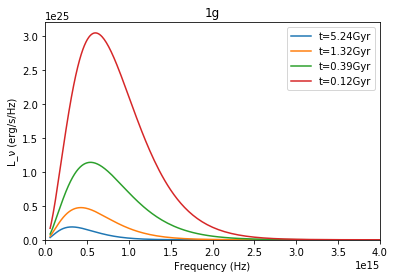

In [68]:
t_steps = τ[np.where((τ >=.1)&(τ<=13))]
int_specs_L = []
int_specs_f = []

for i in range(len(t_steps)): 
    spec_L = 0
    spec_f = 0
    ind = np.where(τ >= t_steps[i]) 
    for j in range(len(ind[0])):
        spec_L += specs_L[j] * N[j]
        spec_f += specs_f[j] * N[j]
    int_specs_L.append(spec_L)
    int_specs_f.append(spec_f)
    

for i in range(len(t_steps)):
    plt.plot(ν, int_specs_L[i], label = 't='+str(np.round(t_steps[i], 2) )+"Gyr")
plt.xlabel('Frequency (Hz)')
plt.ylabel('L_ν (erg/s/Hz)')
plt.title('1g')
plt.axis([0, .4e16, 0, 3.2e25])
plt.legend()

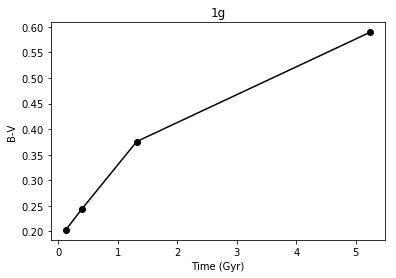

In [69]:
B = 445 * u.nm
V = 551 * u.nm
B_ν = B.to(u.Hz, equivalencies=u.spectral())
V_ν = V.to(u.Hz, equivalencies=u.spectral())
colors = []
for i in range(len(int_specs_f)):
    B_ind = np.argmin(abs(ν-B_ν))
    V_ind = np.argmin(abs(ν-V_ν))
    f_B = int_specs_f[i][B_ind]
    f_V = int_specs_f[i][V_ind]
    m_B = (-2.5*np.log10(f_B.value))-48.6
    m_V = (-2.5*np.log10(f_V.value))-48.6
    B_V = m_B - m_V
    colors.append(B_V)
    
plt.plot(t_steps, colors, 'ko-')
plt.xlabel('Time (Gyr)')
plt.ylabel('B-V')
plt.title('1g')

# Problem 2

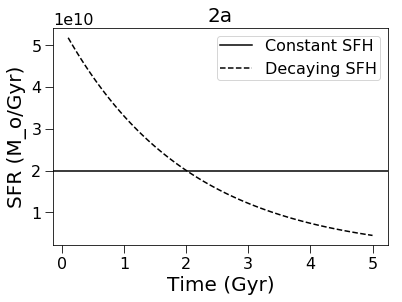

In [44]:
M_tot = 1e11 #M_o
t_tot = 5 #Gyrs
SFR_const = M_tot/t_tot
τ = 2 # Decay timescale (Gyr)
c_exp = - M_tot / (τ * (np.exp(-t_tot/τ)-1))
t = np.linspace(.1,5,100)
SFR_exp = c_exp * np.exp(-t/τ)

plt.axhline(SFR_const, color='k', label='Constant SFH')
plt.plot(t, SFR_exp, 'k--', label='Decaying SFH')
plt.xlabel('Time (Gyr)')
plt.ylabel('SFR (M_o/Gyr)')
plt.title('2a')
plt.legend()

### 2b
Yes, the U-B color would change over time for both SFHs.  
In the case of the constant SFH, though the same amount of massive blue stars would always exist (since they are constantly forming and quickly dying), the number of low mass red stars is constantly going up without old stars dying out, so the longer wavelengths would increase in flux over time relative to the rest of the spectrum.

In the case of an exponentially decaying SFH, the blue end of the spectrum is obviously going to be changing quickly over time; as the instantaneous SFR is closely correlated to the number of high mass stars, as the SFR goes down, so do the number of those stars, and therefor the amount of short wavelength blue light in the spectrum.

### 2c

An expontentially increasing SFH would result in a constant SSFR.  This population would become bluer over time, as you are continually former high massive blue stars in greater numbers.

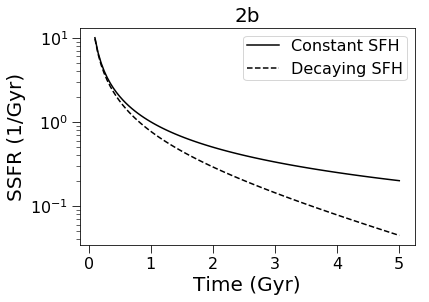

In [43]:
SSFR_const = 1/t
SSFR_exp = -np.exp(-t/τ)/(τ*(np.exp(-t/τ)-1))
plt.semilogy(t, SSFR_const, color='k', label='Constant SFH')
plt.plot(t, SSFR_exp, 'k--', label='Decaying SFH')
plt.xlabel('Time (Gyr)')
plt.ylabel('SSFR (1/Gyr)')
plt.title('2b')
plt.legend()

### 2e

If the IMF was shallower at lower masses, then (assuming the same total number of stars) there would be more lower mass stars.  Because higher mass stars are contributing to the Hα emission, there is less Hα overall, and so the Kennicutt relation would be steeper.

### 2f

In the case of a constant SFH, the Hα emission, like the number of massive blue stars, is roughly constant, while the overall luminosity of the galaxy will go down, therefore the equivalent width of Hα lines will increase over time.
